# 04 Example - Average Scans

In [1]:
import pyscan as ps
import matplotlib.pyplot as plt
import numpy as np
from time import sleep

Could not load Keysight SD1
Could not load Keysight SD1
pylablib not found, AttocubeANC350 not loaded
Basler Camera software not found, BaserCamera not loaded
Helios Camera not installed
msl not installed, Thorlabs BSC203 driver not loaded
seabreeze module not found, Ocean Optics not imported
Failed to load spinapi library.
spinapi is not installed, PulseBlaster driver not loaded.
Thorlabs Kinesis not found, ThorlabsBSC203 not loaded
Thorlabs Kinesis not found, ThorlabsBPC303 not loaded
Thorlabs Kinesis not found, ThorlabsMFF101 not loaded


## Define a measure function

In [11]:
def generate_multiD_data(expt):
    """
    Generates fake data:
    x0 - 0D data (point)
    x1 - 1D data (line)
    x2 - 2D data (grid)
    """
     
    runinfo = expt.runinfo
    devices = expt.devices

    d = ps.ItemAttribute()

    v = runinfo.loop0.i + np.random.randn()
    
    d.x0 = v # point
    d.x1 = [v for i in range(5)] # line
    d.x2 = [[v for i in range(5)] for j in range(5)] # grid
    
    return d

## Setup devices

In [3]:
devices = ps.ItemAttribute()

devices.v1 = ps.TestVoltage() # Device 1
devices.v2 = ps.TestVoltage() # Device 2
devices.v3 = ps.TestVoltage() # Device 3

## Experiments

### 1. 0D scan with loop0 as AverageScan, using point data

This experiment will output data containing a single point, which represents the average of 10 measurements.
Remember, AverageScan does not add a dimension to the experiment as only the averaged value is ultimately saved.

In [12]:
# Setup runinfo with loop0 as AverageScan
runinfo = ps.RunInfo()
runinfo.loop0 = ps.AverageScan(10, dt=0.01)

runinfo.measure_function = generate_multiD_data

expt = ps.Sweep(runinfo, devices)
expt.run()

sleep(1)
expt.x0

Scan 1/1 Complete


4.265238290854812

### 2. 1D Scan with loop1 as AverageScan, using point data

In [14]:
# Setup runinfo with loop0 as PropertyScan and loop1 as AverageScan
runinfo = ps.RunInfo()
runinfo.loop0 = ps.PropertyScan({'v1': ps.drange(0, 0.1, 1)}, prop='voltage', dt=0.01)
runinfo.loop1 = ps.AverageScan(10, dt=0.01)

runinfo.measure_function = generate_multiD_data

expt = ps.Sweep(runinfo, devices)
expt.start_thread()


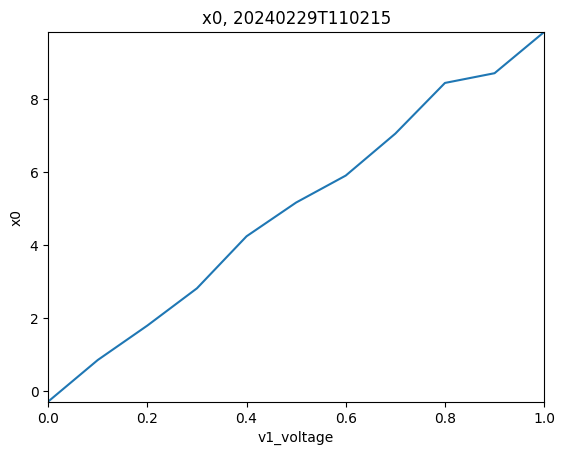

In [15]:
ps.live_plot1D(expt)

### 3. 2D Scan with loop2 as AverageScan, using point data

This scan collects an entire grid of data with 'v1_voltage' on the x axis and 'v2_voltage' on the y axis. This is repeated 10 times, with the new data incoprorated into the average each time.

In [19]:
# Setup runinfo with loop0 and loop1 as PropertyScan and loop2 as AverageScan
runinfo = ps.RunInfo()
runinfo.loop0 = ps.PropertyScan({'v1': ps.drange(0, 0.1, 1)}, prop='voltage', dt=0.01)
runinfo.loop1 = ps.PropertyScan({'v2': ps.drange(0, 0.2, 1)}, prop='voltage', dt=0.01)
runinfo.loop2 = ps.AverageScan(10, dt=0.1)

runinfo.measure_function = generate_multiD_data

expt = ps.Sweep(runinfo, devices)
expt.start_thread()


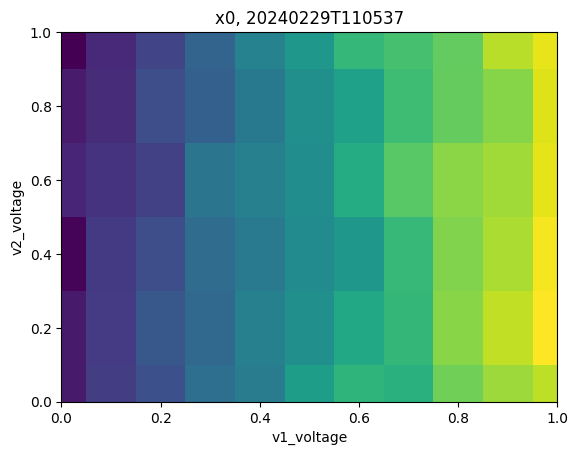

In [20]:
ps.live_plot2D(expt)

### 4. 2D Scan with loop1 as AverageScan, using point data

This scan collects a single row of data iterating over the 'v1_voltage'. This is repeated 10 times, with the new data incoprorated into the average each time. Then, 'v2_volgage' is iterated (y-axis) and the cycle repeats until all scans have been looped through until completion. 

In [25]:
# Setup runinfo with loop0 as PropertyScan, loop1 as AverageScan, and loop2 as PropertyScan
runinfo = ps.RunInfo()
runinfo.loop0 = ps.PropertyScan({'v1': ps.drange(0, 0.1, 1)}, prop='voltage', dt=0.01)
runinfo.loop1 = ps.AverageScan(10, dt=0.1) 
runinfo.loop2 = ps.PropertyScan({'v2': ps.drange(0, 0.2, 1)}, prop='voltage', dt=0.01)

runinfo.measure_function = generate_multiD_data

expt = ps.Sweep(runinfo, devices)
expt.start_thread()


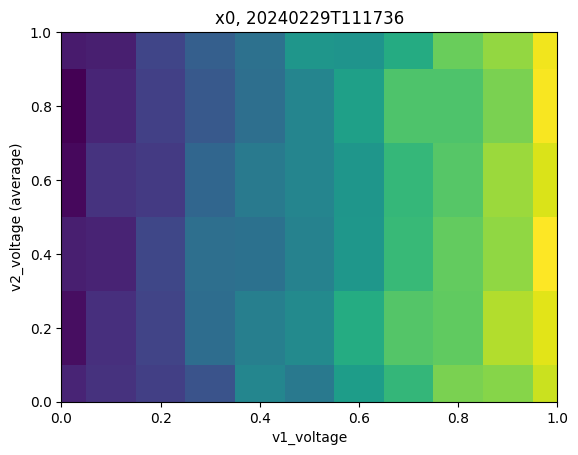

In [26]:
# note the kwargs x_name and y_name must be specified in this case since we are not using the default scans, which are the first two scan instances 
ps.live_plot2D(expt, x_name='v1_voltage', y_name='v2_voltage')